In [1]:
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar
import matplotlib.pyplot as plt
import pyarma as pa


In [2]:
#Probabilistic Cellular Automata
##probability of choosing the local rule
rule =18
def define_f2(x):
    return np.binary_repr(x, width=8)
bin_rule = define_f2(rule) 

def f_cell(xl,x,xr,Lb):
    """ Chose the local rule with probability Lb and the null rule with probability 1-Lb"""
    if np.random.rand()>Lb:
        return 0
    else:
        return int(bin_rule[7-(xl*4+x*2+xr)])

def step_conf(x,Lb):
    """It gives the next configuration of the CA with periodic boundary conditions
    Args:
        x (_type_): configuration array of the CA at fixed time
        rule (_type_): local rule of the CA
    Returns:
        _type_: _description_
    """
    y=np.zeros(len(x)).astype(int)
    y[0]=f_cell(x[-1],x[0],x[1],Lb)
    for i in range(1,len(x)-1):
        y[i]=f_cell(x[i-1],x[i],x[i+1],Lb)
    y[-1]=f_cell(x[-2],x[-1],x[0],Lb)
    return y

def step(x, bin_rule):
    powers_of_two = np.array([[4], [2], [1]])  # shape (3, 1)
    """Makes one step in the cellular automaton.
    Args:
        x (np.array): current state of the automaton
        rule_binary (np.array): the update rule
    Returns:
        np.array: updated state of the automaton
    """
    x_shift_right = np.roll(x, 1)  # circular shift to right
    x_shift_left = np.roll(x, -1)  # circular shift to left
    y = np.vstack((x_shift_right, x, x_shift_left)).astype(np.int8)  # stack row-wise, shape (3, cols)
    z = np.sum(powers_of_two * y, axis=0).astype(np.int8)  # LCR pattern as number


def plot_conf(x):
    """Plot the configuration of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
    Returns:
        _type_: _description_
    """
    plt.figure(figsize=(10,10))
    plt.show()

def density(x):
    """It gives the density of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
    Returns:
        _type_: _description_
    """
    return np.sum(x)/len(x)


|████████████████████████████████████████| 100/100 [100%] in 52.4s (1.91/s)                                             
Density 0.467


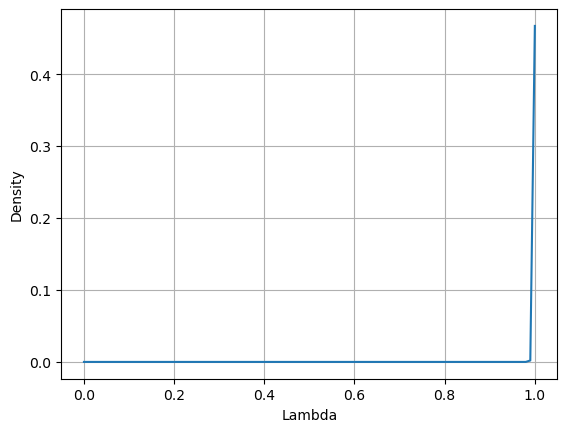

In [4]:
#Starting random configuration 
n=1e3
Lb=np.linspace(0,1,100)
Time = int(500)
x=np.random.randint(0,2,int(n))
h=x
densities=np.zeros(len(Lb))
with alive_bar(len(Lb),force_tty=True) as bar:
    for i in range(0,len(Lb)):
        x=h
        for t in range(Time):
            x=step_conf(x,Lb[i])
        densities[i] = density(x)
        bar()
#print("Density",density(x))
#print("Final  ", x)
print("Density",density(x))
plt.plot(Lb,densities)
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.grid()
plt.show()


In [31]:
# Cellulare Automata Traffic flow model rule 184
# Path: CA.ipynb
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar
import matplotlib.pyplot as plt


Density 0.2551489702059588
